# Capstone EDA

# Time Series / Forecasts: From the basic solution to the complex – daily and monthly- by store and by product



# By Alex Dance


Data is from the below Kaggle Dataset
https://www.kaggle.com/c/demand-forecasting-kernels-only/overview
This competition is provided as a way to explore different time series techniques on a relatively simple and clean dataset.

You are given 5 years of store-item sales data, and asked to predict 3 months of sales for 50 different items at 10 different stores.

What's the best way to deal with seasonality? Should stores be modeled separately, or can you pool them together? Does deep learning work better than ARIMA? Can either beat xgboost?

This is a great competition to explore different models and improve your skills in forecasting.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:/Users/alexd/Alex Folder 1/Capstone - Store Forecast/train.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
df.shape

In [4]:
originaldf = df.copy()

# EDA

In [5]:
df.shape

(913000, 4)

In [6]:
df.nunique()

date     1826
store      10
item       50
sales     213
dtype: int64

In [7]:
df['date'] =  pd.to_datetime(df['date'])

# Other Data Files

In [8]:
test =  pd.read_csv(r'C:/Users/alexd/Alex Folder 1/Capstone - Store Forecast/test.csv')
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [9]:
df.max()

date     2017-12-31 00:00:00
store                     10
item                      50
sales                    231
dtype: object

In [10]:
test.min()

id                0
date     2018-01-01
store             1
item              1
dtype: object

In [11]:
test.max()

id            44999
date     2018-03-31
store            10
item             50
dtype: object

In [12]:
submission = pd.read_csv(r'C:/Users/alexd/Alex Folder 1/Capstone - Store Forecast/sample_submission.csv')
submission.head()

,id,sales
0,0,52
1,1,52
2,2,52
3,3,52
4,4,52


# Back to Main

In [13]:
df.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [14]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [15]:
#df = df.set_index(pd.DatetimeIndex(df['date']))

# Set Date as Index

In [16]:
df = df.set_index('date')

In [17]:
df.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [18]:
df_sales_only = df.drop(['store','item'], axis = 1)

In [19]:
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofweek'] = df.index.dayofweek


In [20]:
print(df)

            store  item  sales  day  month  year  dayofweek
date                                                       
2013-01-01      1     1     13    1      1  2013          1
2013-01-02      1     1     11    2      1  2013          2
2013-01-03      1     1     14    3      1  2013          3
2013-01-04      1     1     13    4      1  2013          4
2013-01-05      1     1     10    5      1  2013          5
...           ...   ...    ...  ...    ...   ...        ...
2017-12-27     10    50     63   27     12  2017          2
2017-12-28     10    50     59   28     12  2017          3
2017-12-29     10    50     74   29     12  2017          4
2017-12-30     10    50     62   30     12  2017          5
2017-12-31     10    50     82   31     12  2017          6

[913000 rows x 7 columns]


In [21]:
import seaborn as sns

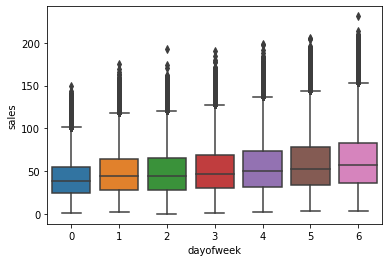

In [22]:
sns.boxplot(x="dayofweek", y="sales", data=df)

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['sales'], model='additive', freq=365)

C:\Users\alexd\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


<Figure size 432x288 with 0 Axes>

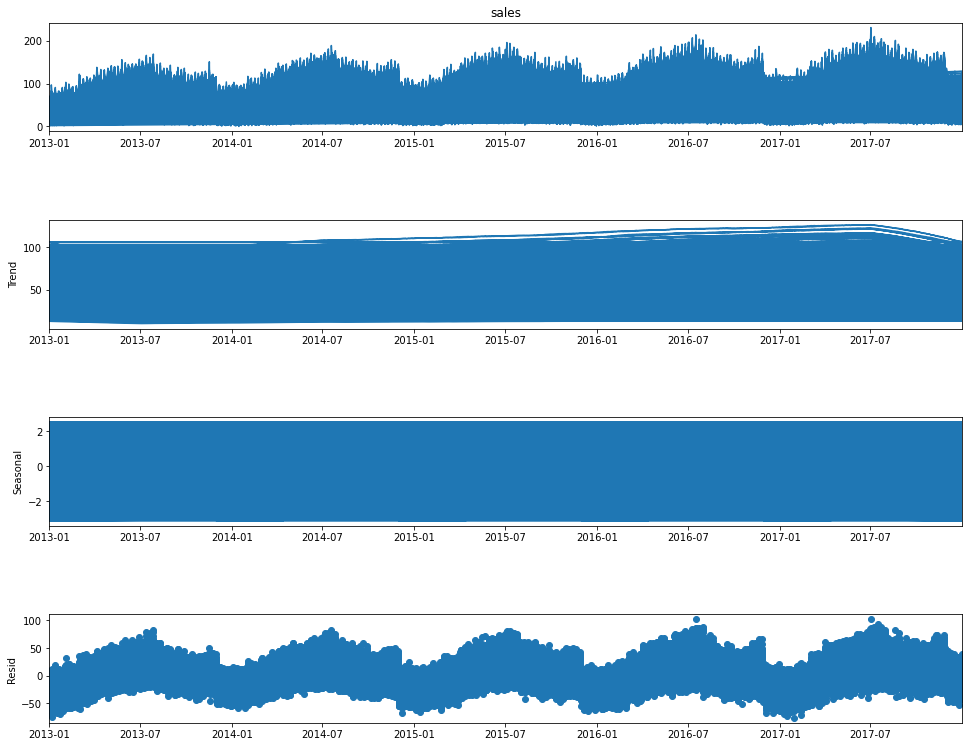

In [24]:
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

# Working With 1 product in 1 store

In [25]:
df.groupby(['store','item']).size()

store  item
1      1       1826
       2       1826
       3       1826
       4       1826
       5       1826
               ... 
10     46      1826
       47      1826
       48      1826
       49      1826
       50      1826
Length: 500, dtype: int64

In [26]:
df[(df.store==1) & (df.item==1)]

,store,item,sales,day,month,year,dayofweek
date,,,,,,,
2013-01-01,1,1,13,1,1,2013,1
2013-01-02,1,1,11,2,1,2013,2
2013-01-03,1,1,14,3,1,2013,3
2013-01-04,1,1,13,4,1,2013,4
2013-01-05,1,1,10,5,1,2013,5
...,...,...,...,...,...,...,...
2017-12-27,1,1,14,27,12,2017,2
2017-12-28,1,1,19,28,12,2017,3
2017-12-29,1,1,15,29,12,2017,4


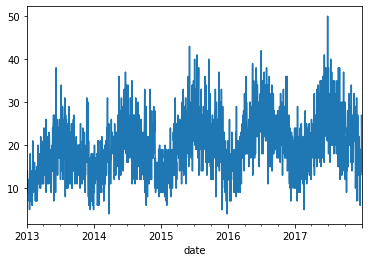

In [27]:
df[(df.store==1) & (df.item==1)]['sales'].plot()

In [28]:
df[(df.store==1) & (df.item==1)]['sales']

date
2013-01-01    13
2013-01-02    11
2013-01-03    14
2013-01-04    13
2013-01-05    10
              ..
2017-12-27    14
2017-12-28    19
2017-12-29    15
2017-12-30    27
2017-12-31    23
Name: sales, Length: 1826, dtype: int64

In [29]:
df_1_1 = df[(df.store==1) & (df.item==1)]['sales']

split = "2017-01-01"

In [30]:
df_i1_s1 = df[(df.store==1) & (df.item==1)]['sales']
df_i1_s2 = df[(df.store==2) & (df.item==1)]['sales']
df_i2_s1 = df[(df.store==1) & (df.item==2)]['sales']
df_i2_s2 = df[(df.store==2) & (df.item==2)]['sales']

In [31]:
df_i1_s1.head(10)

date
2013-01-01    13
2013-01-02    11
2013-01-03    14
2013-01-04    13
2013-01-05    10
2013-01-06    12
2013-01-07    10
2013-01-08     9
2013-01-09    12
2013-01-10     9
Name: sales, dtype: int64

In [32]:
df_i1_s2.head(10)

date
2013-01-01    12
2013-01-02    16
2013-01-03    16
2013-01-04    20
2013-01-05    16
2013-01-06    18
2013-01-07    12
2013-01-08    11
2013-01-09    16
2013-01-10    10
Name: sales, dtype: int64

In [33]:
df_i2_s1.head(10)
            

date
2013-01-01    33
2013-01-02    43
2013-01-03    23
2013-01-04    18
2013-01-05    34
2013-01-06    38
2013-01-07    27
2013-01-08    28
2013-01-09    34
2013-01-10    27
Name: sales, dtype: int64

In [34]:
df_i2_s2.head(10)

date
2013-01-01    41
2013-01-02    33
2013-01-03    46
2013-01-04    50
2013-01-05    44
2013-01-06    57
2013-01-07    27
2013-01-08    43
2013-01-09    38
2013-01-10    49
Name: sales, dtype: int64

In [35]:
df_i1_s1.tail()

date
2017-12-27    14
2017-12-28    19
2017-12-29    15
2017-12-30    27
2017-12-31    23
Name: sales, dtype: int64

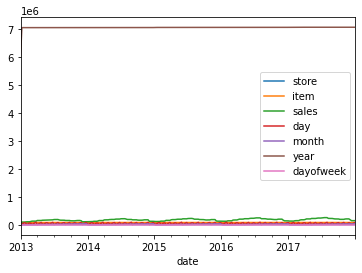

In [36]:
df.resample('W').sum().plot()

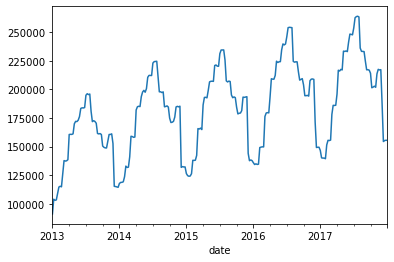

In [37]:
df['sales'].resample('W').sum().plot()

In [38]:
df_i1_s1.to_frame()
df_i1_s2.to_frame()
df_i2_s1.to_frame()
df_i2_s1.to_frame()

,sales
date,
2013-01-01,33
2013-01-02,43
2013-01-03,23
2013-01-04,18
2013-01-05,34
...,...
2017-12-27,55
2017-12-28,50
2017-12-29,50


In [39]:
split1 = "2013-12-31"

In [40]:
df_i1_s1_a = df_i1_s1[:split1] 
df_i1_s2_a = df_i1_s2[:split1] 
df_i2_s1_a = df_i2_s1[:split1] 
df_i2_s2_a = df_i2_s2[:split1] 


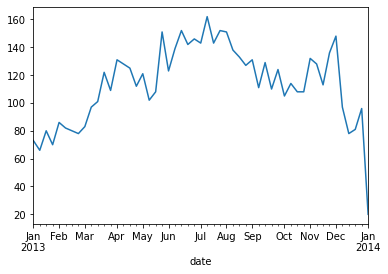

In [41]:
df_i1_s1_a.resample('W').sum().plot()

In [42]:
df_i1_s2_a.head(10)

date
2013-01-01    12
2013-01-02    16
2013-01-03    16
2013-01-04    20
2013-01-05    16
2013-01-06    18
2013-01-07    12
2013-01-08    11
2013-01-09    16
2013-01-10    10
Name: sales, dtype: int64

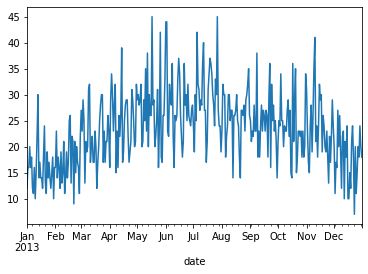

In [43]:
df_i1_s2_a.resample('D').sum().plot()

In [44]:
df_i2_s1_a.head()

date
2013-01-01    33
2013-01-02    43
2013-01-03    23
2013-01-04    18
2013-01-05    34
Name: sales, dtype: int64

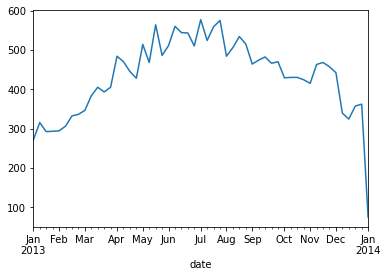

In [45]:
df_i2_s2_a.resample('W').sum().plot()

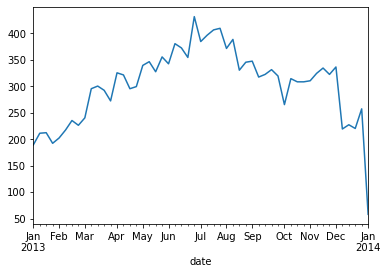

In [46]:
df_i2_s1_a.resample('W').sum().plot()

In [47]:
df_1_1.to_frame()

,sales
date,
2013-01-01,13
2013-01-02,11
2013-01-03,14
2013-01-04,13
2013-01-05,10
...,...
2017-12-27,14
2017-12-28,19
2017-12-29,15


In [48]:
df_1_1 = df_1_1.to_frame()

In [49]:
df_xg_1_1= df_1_1.copy()  # it was here

In [50]:
df_1_1.head()

,sales
date,
2013-01-01,13
2013-01-02,11
2013-01-03,14
2013-01-04,13
2013-01-05,10


In [51]:
df_1_1['sales-1'] = df_1_1['sales'].shift(1)

In [52]:
df_1_1['sales+2'] = df_1_1['sales'].shift(-2)

In [53]:
df_1_1.head()

,sales,sales-1,sales+2
date,,,
2013-01-01,13,NaN,14.0
2013-01-02,11,13.0,13.0
2013-01-03,14,11.0,10.0
2013-01-04,13,14.0,12.0
2013-01-05,10,13.0,10.0


In [54]:
df_1_1['sales-2'] = df_1_1['sales'].shift(2)

In [55]:
df_1_1.head()

,sales,sales-1,sales+2,sales-2
date,,,,
2013-01-01,13,NaN,14.0,NaN
2013-01-02,11,13.0,13.0,NaN
2013-01-03,14,11.0,10.0,13.0
2013-01-04,13,14.0,12.0,11.0
2013-01-05,10,13.0,10.0,14.0


In [56]:
df_1_1 = df_1_1.dropna()

In [57]:
df_1_1.head()

,sales,sales-1,sales+2,sales-2
date,,,,
2013-01-03,14,11.0,10.0,13.0
2013-01-04,13,14.0,12.0,11.0
2013-01-05,10,13.0,10.0,14.0
2013-01-06,12,10.0,9.0,13.0
2013-01-07,10,12.0,12.0,10.0


In [58]:
df_1_1.tail()

,sales,sales-1,sales+2,sales-2
date,,,,
2017-12-25,13,19.0,14.0,18.0
2017-12-26,16,13.0,19.0,19.0
2017-12-27,14,16.0,15.0,13.0
2017-12-28,19,14.0,27.0,16.0
2017-12-29,15,19.0,23.0,14.0


In [59]:
df_1_1['sales+1'] = df_1_1['sales'].shift(-1)

In [60]:
df_1_1.head()

,sales,sales-1,sales+2,sales-2,sales+1
date,,,,,
2013-01-03,14,11.0,10.0,13.0,13.0
2013-01-04,13,14.0,12.0,11.0,10.0
2013-01-05,10,13.0,10.0,14.0,12.0
2013-01-06,12,10.0,9.0,13.0,10.0
2013-01-07,10,12.0,12.0,10.0,9.0


In [61]:
df_1_1.tail()

,sales,sales-1,sales+2,sales-2,sales+1
date,,,,,
2017-12-25,13,19.0,14.0,18.0,16.0
2017-12-26,16,13.0,19.0,19.0,14.0
2017-12-27,14,16.0,15.0,13.0,19.0
2017-12-28,19,14.0,27.0,16.0,15.0
2017-12-29,15,19.0,23.0,14.0,NaN


In [62]:
df_1_1_test = df_1_1[split : ] 

In [63]:
df_1_1_train = df_1_1[ :split ] 

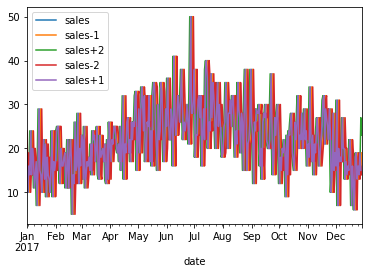

In [64]:
df_1_1_test.plot()

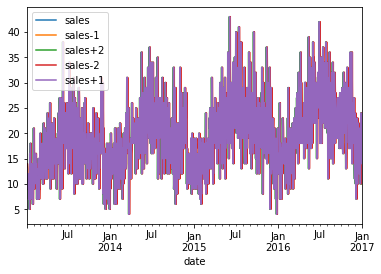

In [65]:
df_1_1_train.plot()

In [66]:
X_train = df_1_1_train[['sales','sales-1','sales-2']]

In [67]:
y_train = df_1_1_train['sales+1']

In [68]:
X_test = df_1_1_test[['sales','sales-1','sales-2']]

In [69]:
y_test = df_1_1_test['sales+1']

# Other

In [72]:
agg_month_item = pd.pivot_table(df, index='month', columns='item', values='sales', aggfunc=np.sum).values

In [73]:
print(agg_month_item)

[[ 22987  61861  38669  22891  19429  61532  61533  80892  54026  77770
   73279  72923  88719  62095  93361  26882  34807  88737  42562  49830
   42383  84643  31043  69725  84973  50004  23218  93187  73382  42533
   61685  46398  73126  27285  69554  81116  30905  85045  46451  30843
   23390  38686  54217  31034  84770  61953  23156  53815  30709  69135]
 [ 23346  62662  38833  23310  19507  61974  61933  81600  54967  77725
   74159  74109  89388  63069  93185  27508  34896  89965  42951  50654
   42856  85756  31242  70126  85643  50693  23139  92984  74140  42933
   62524  46704  73972  27265  70466  81746  30997  85142  46527  30971
   23345  38974  54621  31152  85373  62187  23439  54699  30961  69859]
 [ 30539  82407  51077  30714  25639  82257  82435 108269  72441 102629
   97449  97574 118478  81896 123894  36159  46268 117814  56683  66772
   56604 113086  41396  92756 113192  67158  30820 123320  97395  56658
   82596  61091  97910  36248  92294 107743  41271 112833  617

In [75]:
df["2017-01-03" : "2017-01-20"].sales.sum()

357733

In [76]:
df.dtypes

store        int64
item         int64
sales        int64
day          int64
month        int64
year         int64
dayofweek    int64
dtype: object

In [77]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=913000, freq=None)

In [78]:
df.head()

,store,item,sales,day,month,year,dayofweek
date,,,,,,,
2013-01-01,1,1,13,1,1,2013,1
2013-01-02,1,1,11,2,1,2013,2
2013-01-03,1,1,14,3,1,2013,3
2013-01-04,1,1,13,4,1,2013,4
2013-01-05,1,1,10,5,1,2013,5


In [79]:
df["2017-01"]

,store,item,sales,day,month,year,dayofweek
date,,,,,,,
2017-01-01,1,1,19,1,1,2017,6
2017-01-02,1,1,15,2,1,2017,0
2017-01-03,1,1,10,3,1,2017,1
2017-01-04,1,1,16,4,1,2017,2
2017-01-05,1,1,14,5,1,2017,3
...,...,...,...,...,...,...,...
2017-01-27,10,50,61,27,1,2017,4
2017-01-28,10,50,65,28,1,2017,5
2017-01-29,10,50,66,29,1,2017,6


# Plotting 1

In [80]:
df["2017-01-03" : "2017-01-20"].sales.sum()

357733

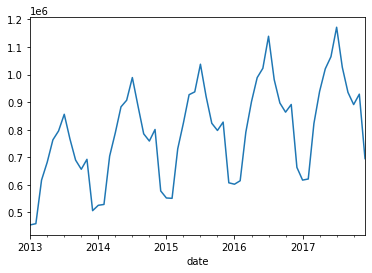

In [81]:
df.sales.resample('M').sum().plot()

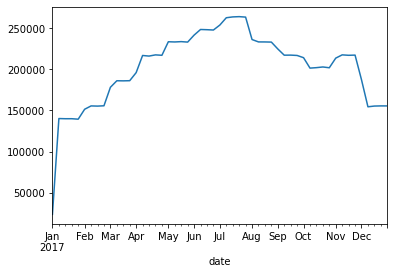

In [82]:
df["2017-01-01" : "2017-12-31"].sales.resample('W').sum().plot()

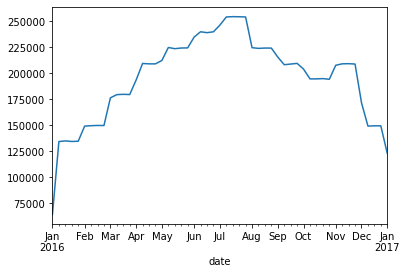

In [83]:
df["2016-01-01" : "2016-12-31"].sales.resample('W').sum().plot()

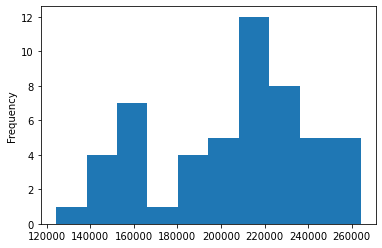

In [84]:
df["2017-01-03" : "2017-12-31"].sales.resample('W').sum().plot(kind="hist")

DATA SEt optios https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

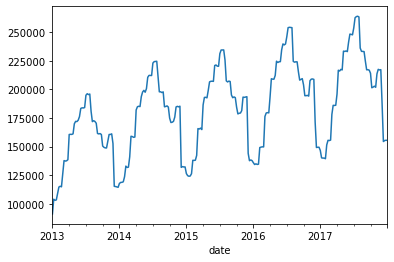

In [85]:
df.sales.resample('W').sum().plot()

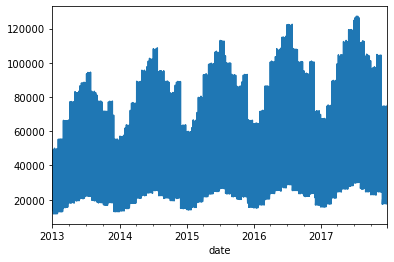

In [86]:
df.sales.resample('B').sum().plot()

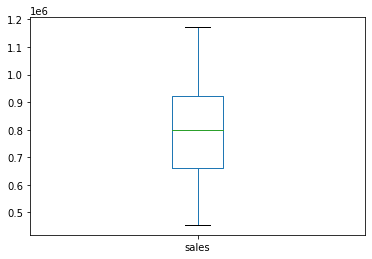

In [87]:
df.sales.resample('M').sum().plot(kind = "box")